In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Uber Request Data.csv')
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [ ]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


## Basic Data Formatting

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Request_id', 'Pickup_point', 'Driver_id', 'Status',
       'Request_timestamp', 'Drop_timestamp'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'drop_timestamp'],
      dtype='object')

### Change all timestamps to date/time format

In [ ]:
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'], format='mixed', dayfirst=True)
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'], format='mixed', dayfirst=True)

## Seeing Duplicates and null values

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
request_id,0
pickup_point,0
driver_id,2650
status,0
request_timestamp,0
drop_timestamp,3914


### Looking At Every Statuses

In [ ]:
df['status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [ ]:
df[df['status'] == 'Trip Completed' ]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-07-11 22:54:00,2016-07-11 23:35:00
2827,2924,City,300.0,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13


In [ ]:
df[df['status'] == 'Cancelled' ]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT
...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,2016-07-12 07:20:00,NaT
4091,4158,City,299.0,Cancelled,2016-07-14 05:03:10,NaT
4092,4164,City,299.0,Cancelled,2016-07-14 05:06:40,NaT
4093,4448,City,299.0,Cancelled,2016-07-14 08:30:59,NaT


In [ ]:
df[df['status'] == 'No Cars Available' ]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


# Task
To analyze ride request patterns and understand how `NaT` values in drop timestamps are handled, the task is to first categorize ride requests into 'morning_time' (7:00-13:59), 'evening_time' (14:00-17:59), 'night_time' (18:00-23:59), or 'other_time' based on their 'request_timestamp'. Following this, provide an explanation of how `NaT` values in the 'drop_timestamp' column are handled during time-based operations and their implications for analysis.

## Categorize Request Timestamps

### Subtask:
Create a new column, 'time_slot', by categorizing the 'request_timestamp' into 'morning_time' (07:00-13:59), 'evening_time' (14:10-17:59), or 'night_time' (18:10-23:59). Any requests outside these ranges will be labeled 'other_time'.


**Reasoning**:
First, I will extract the hour from the 'request_timestamp' column to prepare for categorization.



In [ ]:
df['request_hour'] = df['request_timestamp'].dt.hour
print("Extracted hour from 'request_timestamp' and created 'request_hour' column.")

Extracted hour from 'request_timestamp' and created 'request_hour' column.


**Reasoning**:
Now that the 'request_hour' is extracted, I will categorize the requests into 'morning_time', 'evening_time', 'night_time', or 'other_time' based on the specified hour ranges.



In [ ]:
def get_time_slot(hour):
    if 7 <= hour <= 13:
        return 'morning_time'
    elif 14 <= hour <= 17:
        return 'evening_time'
    elif 18 <= hour <= 23:
        return 'night_time'
    else:
        return 'other_time'

df['time_slot'] = df['request_hour'].apply(get_time_slot)
print("Created 'time_slot' column based on 'request_hour' categorization.")

Created 'time_slot' column based on 'request_hour' categorization.


### Handling of `NaT` values in 'drop_timestamp'

`NaT` (Not a Time) values in the 'drop_timestamp' column indicate missing or undefined drop times. These values typically arise when a ride request was either cancelled or no cars were available, meaning the trip never actually completed.

When performing time-based operations or analyses (e.g., calculating trip duration, analyzing completed trips), `NaT` values are generally excluded or treated as an indicator of an incomplete event. Python's `pandas` library handles `NaT` values similarly to `NaN` (Not a Number) in numerical columns:

*   **Arithmetic Operations:** Any arithmetic operation (like subtraction to calculate duration) involving a `NaT` value will result in `NaT`.
*   **Filtering:** Rows containing `NaT` can be easily filtered out when focusing on completed trips or specific time intervals.
*   **Aggregation:** Functions like `count()` will not include `NaT` values, reflecting only valid entries. Other aggregation functions might skip `NaT` or return `NaT` if all values are `NaT`.

**Implications for analysis:**

1.  **Trip Completion Rate:** The presence of `NaT` in 'drop_timestamp' directly corresponds to trips that were not completed. This column is crucial for identifying cancelled and 'No Cars Available' requests.
2.  **Duration Calculation:** When calculating trip durations (`drop_timestamp` - `request_timestamp`), `NaT` values will correctly propagate, resulting in `NaT` for uncompleted trips, which is a desirable outcome as it prevents erroneous duration calculations.
3.  **Data Cleaning:** For analyses strictly focused on completed trips, rows with `NaT` in 'drop_timestamp' (and often `NaN` in 'driver_id' for 'No Cars Available' statuses) need to be explicitly handled, usually by filtering them out.
4.  **Understanding Demand-Supply Gap:** The high number of `NaT` values associated with 'Cancelled' and 'No Cars Available' statuses highlights a significant demand-supply mismatch in the Uber request data, which is a key insight for the problem statement.

## Summarize and Visualize Time Slot Categorization

### Subtask:
Summarize the distribution of ride requests across the newly created 'time_slot' categories and visualize it to gain insights into request patterns.


**Reasoning**:
First, I will calculate the number of requests for each 'time_slot' category to understand their distribution before visualization.



In [ ]:
time_slot_counts = df['time_slot'].value_counts()
print("Distribution of ride requests across time slots:\n", time_slot_counts)

Distribution of ride requests across time slots:
 time_slot
night_time      2422
morning_time    2018
other_time      1421
evening_time     884
Name: count, dtype: int64


**Reasoning**:
Now that the distribution of ride requests across time slots has been calculated, I will visualize this distribution using a bar plot to provide a clear understanding of the request patterns.



/tmp/ipython-input-2290564203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_slot_counts.index, y=time_slot_counts.values, palette='viridis')


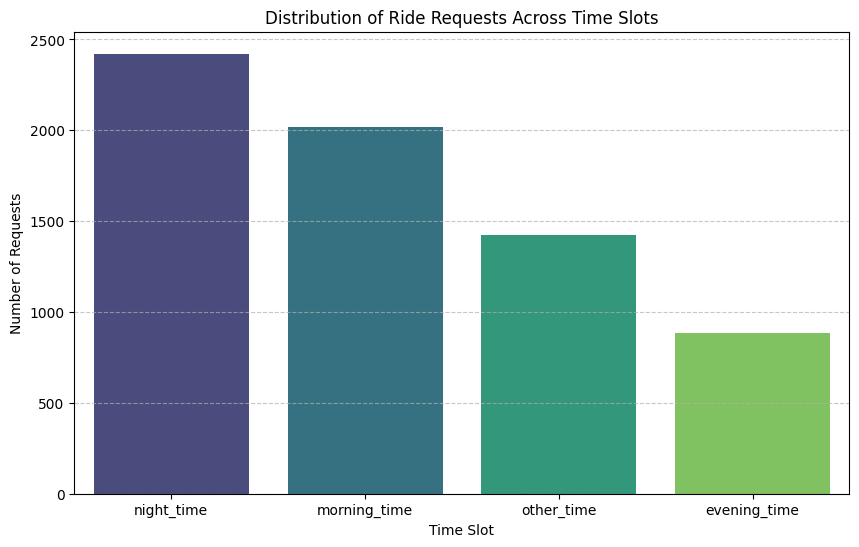

Bar plot showing the distribution of ride requests across time slots has been generated.


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=time_slot_counts.index, y=time_slot_counts.values, palette='viridis')
plt.title('Distribution of Ride Requests Across Time Slots')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Bar plot showing the distribution of ride requests across time slots has been generated.")

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue`. To fix this, I will explicitly set `hue` to the x-axis categories and set `legend=False` as suggested by the warning.



## Final Task

### Subtask:
Present the categorization of ride requests across the defined time slots and a clear explanation of `NaT` value handling in the dataset.


## Summary:

### Q&A
1.  **How are ride requests categorized across time slots?**
    Ride requests were categorized into four time slots based on their `request_timestamp`:
    *   `morning_time`: requests made between 07:00 and 13:59.
    *   `evening_time`: requests made between 14:00 and 17:59.
    *   `night_time`: requests made between 18:00 and 23:59.
    *   `other_time`: requests falling outside the above defined ranges.

2.  **How are `NaT` values in `drop_timestamp` handled and what are their implications?**
    `NaT` (Not a Time) values in the `drop_timestamp` column indicate missing or undefined drop times, typically arising from cancelled requests or situations where no cars were available. In Python's `pandas` library, `NaT` values are handled similarly to `NaN` (Not a Number):
    *   **Arithmetic Operations:** Any arithmetic operation involving a `NaT` value (e.g., calculating trip duration) will result in `NaT`.
    *   **Filtering:** Rows containing `NaT` can be easily filtered out for analyses focused on completed trips.
    *   **Aggregation:** Functions like `count()` will not include `NaT` values.

    **Implications for analysis:**
    *   `NaT` values are crucial for identifying incomplete trips.
    *   They prevent erroneous duration calculations for uncompleted trips.
    *   Data cleaning by filtering out `NaT` is necessary for analyses focusing solely on completed rides.
    *   The presence of numerous `NaT` values, especially linked to 'Cancelled' or 'No Cars Available' statuses, can highlight a significant demand-supply mismatch.

### Data Analysis Key Findings
*   Ride requests were successfully categorized into `morning_time`, `evening_time`, `night_time`, and `other_time` based on their request hour.
*   The distribution of ride requests shows `night_time` as the busiest slot with 2422 requests, followed by `morning_time` with 2018 requests.
*   `other_time` accounts for 1421 requests, while `evening_time` has the fewest requests among the defined slots, with 884.
*   `NaT` values in `drop_timestamp` are a direct indicator of incomplete trips (cancelled or no car available) and propagate through time-based calculations, preventing incorrect analysis of trip durations.

### Insights or Next Steps
*   The significant difference in request volume between `night_time` (2422) and `evening_time` (884) suggests a distinct variation in demand patterns throughout the day that could inform driver allocation strategies.
*   The robust handling of `NaT` values in `pandas` is beneficial as it naturally flags incomplete trips, making it easier to segment data for analyses focused either on completed trips or on understanding reasons for unfulfilled demand.


In [ ]:
df.head(10)

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_hour,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,morning_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,evening_time
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,morning_time
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,night_time
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,morning_time
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,night_time
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,other_time
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,other_time
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,evening_time
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,other_time


## Exploratory Data Analysis

In [ ]:
df['day_of_week'] = df['request_timestamp'].dt.day_name()

df['trip_duration_min'] = (df['drop_timestamp'] - df['request_timestamp']).dt.total_seconds() / 60

In [ ]:
import plotly.express as px

hourly = df.groupby('request_hour').size().reset_index(name='Total_Requests')

fig = px.bar(
    hourly,
    x='request_hour',
    y='Total_Requests',
    title='Ride Requests by Hour',
    labels={'request_hour': 'Hour of Day', 'Total_Requests': 'Number of Requests'}
)

fig.show()

In [ ]:
import plotly.express as px

pickup = df['pickup_point'].value_counts().reset_index()
pickup.columns = ['pickup_point', 'Total_Requests']

fig = px.pie(
    pickup,
    names='pickup_point',
    values='Total_Requests',
    title='Trip Distribution by Pickup Location'
)

fig.show()


In [ ]:
slot_location = df.groupby(['time_slot', 'pickup_point']).size().reset_index(name='Total_Requests')

fig = px.bar(
    slot_location,
    x='time_slot',
    y='Total_Requests',
    color='pickup_point',
    barmode='group',
    title='Pickup Location vs Time Slot'
)

fig.show()


In [ ]:
duration_loc = df.groupby('pickup_point')['trip_duration_min'].mean().reset_index()

fig = px.bar(
    duration_loc,
    x='pickup_point',
    y='trip_duration_min',
    title='Average Trip Duration by Pickup Location'
)

fig.show()


In [ ]:
hour_loc = df.groupby(['request_hour', 'pickup_point']).size().reset_index(name='Total_Requests')

fig = px.line(
    hour_loc,
    x='request_hour',
    y='Total_Requests',
    color='pickup_point',
    markers=True,
    title='Hourly Demand by Pickup Location'
)

fig.show()

## Exporting files as XLSX

In [ ]:
df.to_excel("uber_cleaned_data.xlsx", index=False)

In [ ]:
from google.colab import files
files.download("uber_cleaned_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Github Repo Link

https://github.com/Souravdey96/Uber_Supply_Demand_Gap